Во вложении представлен массив данных по вымышленным выданным POS-кредитам (кредитам на определенный товар). Первая строка содержит заголовки, далее идут данные, разделитель точка с запятой. Последний столбец отвечает за факт дефолта по займу. От вас требуется подготовить презентацию:

1) с аналитическим исследованием по представленному набору данных, от вас требуется отобразить информацию по качеству, структуре. При этом просим вас внимательно изучить данные и при выявлении интересных сегментов/зависимостей это также отобразить. Ограничение по слайдам 15 шт.

2) с рекомендациями, математической моделью или любым инструментом, который позволит снизить дефолт. Ограничение по слайдам 5 шт.

3) допускается включение титульного слайда и слайда с заключительной информацией сверх лимита.

In [2]:
import pandas as pd

data = pd.read_excel('data_bank.xlsx', sep=";")

In [3]:
data.head()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,Нет дефолта
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,Нет дефолта
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,Нет дефолта
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,Нет дефолта
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,Нет дефолта


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
Месяц выдачи кредита          1723 non-null int64
Сумма кредита                 1723 non-null int64
Срок кредита                  1723 non-null int64
Возраст клиента               1723 non-null int64
Пол клиента                   1723 non-null object
Образование клиента           1723 non-null object
Тип товара                    1723 non-null object
Наличие детей у клиента       1723 non-null object
Регион выдачи кредита         1723 non-null object
Доход клиента                 1723 non-null int64
Семейное положение            1723 non-null object
Оператор связи                1723 non-null object
Является ли клиентом банка    1723 non-null object
Флаг дефолта по кредиту       1723 non-null object
dtypes: int64(5), object(9)
memory usage: 188.5+ KB


In [5]:
numerical_feat = ['Сумма кредита', "Срок кредита", "Возраст клиента", "Доход клиента"]
categ_feat = data.columns.drop(numerical_feat).drop(["Месяц выдачи кредита"]).tolist()
categ_feat

['Пол клиента',
 'Образование клиента',
 'Тип товара',
 'Наличие детей у клиента',
 'Регион выдачи кредита',
 'Семейное положение',
 'Оператор связи',
 'Является ли клиентом банка',
 'Флаг дефолта по кредиту']

In [6]:
# data.describe()

In [7]:
# for x in data.columns:
#     print(data[[x]])
    
# data['Тип товара']

In [8]:
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline


In [9]:
data[categ_feat].columns

Index(['Пол клиента', 'Образование клиента', 'Тип товара',
       'Наличие детей у клиента', 'Регион выдачи кредита',
       'Семейное положение', 'Оператор связи', 'Является ли клиентом банка',
       'Флаг дефолта по кредиту'],
      dtype='object')

In [10]:
new_categ = []
for x in categ_feat:
    data[x + '_le'] = data[x]
    new_categ.append(x + '_le')
data
new_categ

['Пол клиента_le',
 'Образование клиента_le',
 'Тип товара_le',
 'Наличие детей у клиента_le',
 'Регион выдачи кредита_le',
 'Семейное положение_le',
 'Оператор связи_le',
 'Является ли клиентом банка_le',
 'Флаг дефолта по кредиту_le']

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in new_categ:
    data[x] = le.fit_transform(data[x])
    
data

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,...,Флаг дефолта по кредиту,Пол клиента_le,Образование клиента_le,Тип товара_le,Наличие детей у клиента_le,Регион выдачи кредита_le,Семейное положение_le,Оператор связи_le,Является ли клиентом банка_le,Флаг дефолта по кредиту_le
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,...,Нет дефолта,1,5,8,0,0,0,2,1,1
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,...,Нет дефолта,1,5,2,1,0,0,4,0,1
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,...,Нет дефолта,0,5,2,0,0,0,0,1,1
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,...,Нет дефолта,1,5,8,1,0,2,4,0,1
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,...,Нет дефолта,0,0,8,0,0,1,2,0,1
5,1,32500,24,47,Женский,Среднее специальное,Мебель,Детей нет,Другие регионы,26000,...,Нет дефолта,0,5,6,0,0,1,2,0,1
6,1,8000,3,23,Мужской,Высшее,"Компьютеры, комплектующие",Детей нет,Другие регионы,21000,...,Нет дефолта,1,0,4,0,0,0,2,0,1
7,1,20000,10,25,Женский,Высшее,Бытовая техника,Детей нет,Москва или МО,33000,...,Нет дефолта,0,0,2,0,1,1,0,0,1
8,1,26000,6,21,Женский,Среднее специальное,Мобильные телефоны,Детей нет,Москва или МО,31000,...,Нет дефолта,0,5,8,0,1,0,0,0,1
9,1,15000,24,25,Женский,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,26000,...,Нет дефолта,0,5,2,1,0,0,4,1,1


In [12]:
data[numerical_feat].describe()

,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента
count,1723.000000,1723.000000,1723.000000,1723.000000
mean,29264.654672,11.546721,35.911782,32652.350551
std,27926.778301,6.548354,13.120203,20913.193158
min,5000.000000,3.000000,18.000000,1000.000000
25%,13000.000000,6.000000,26.000000,21000.000000
50%,21500.000000,12.000000,32.000000,27000.000000
75%,34000.000000,12.000000,44.000000,38000.000000
max,301000.000000,36.000000,90.000000,401000.000000


Text(0.5,1,'Распределение дефолтов')

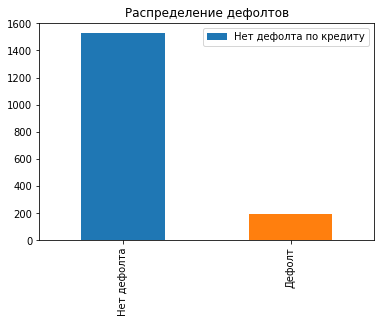

In [13]:
data['Флаг дефолта по кредиту'].value_counts().plot(kind='bar', label='Нет дефолта по кредиту')
plt.legend()
plt.title('Распределение дефолтов')

Данные не сбалансированы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9f40ac898>,
      dtype=object)

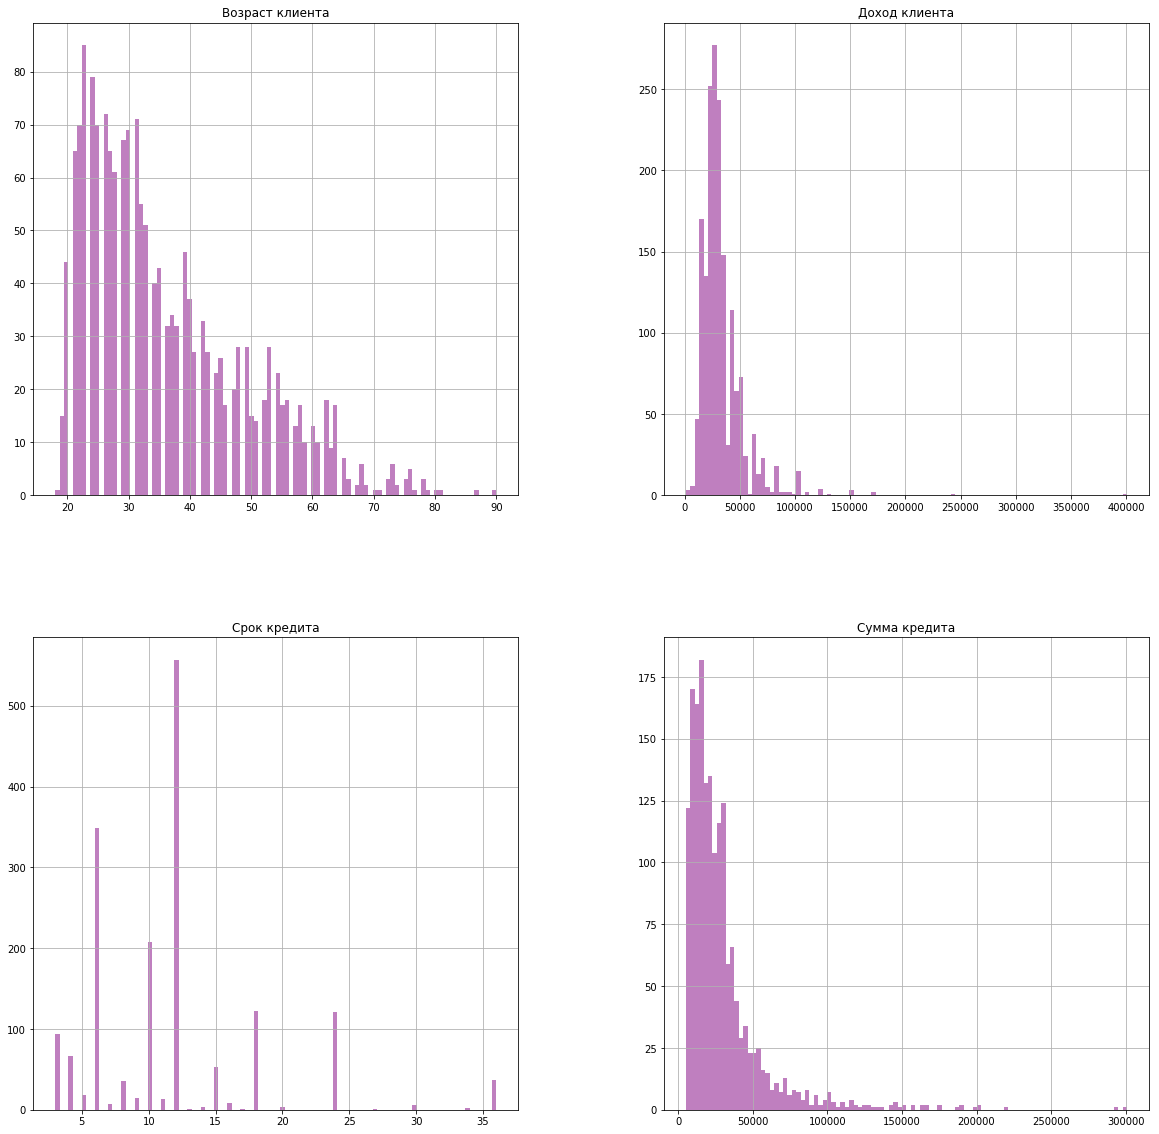

In [14]:
data[numerical_feat].hist(color='purple', alpha=0.5, bins=100, figsize =(20, 20) )

Основные заемщики:
    - от 21 до 33 лет
    - с доходом меньше 50000
    - со сроком займа на 6, 10, 12 месяцев
    - с суммой займа меньше 40000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9ebe80cc0>,
      dtype=object)

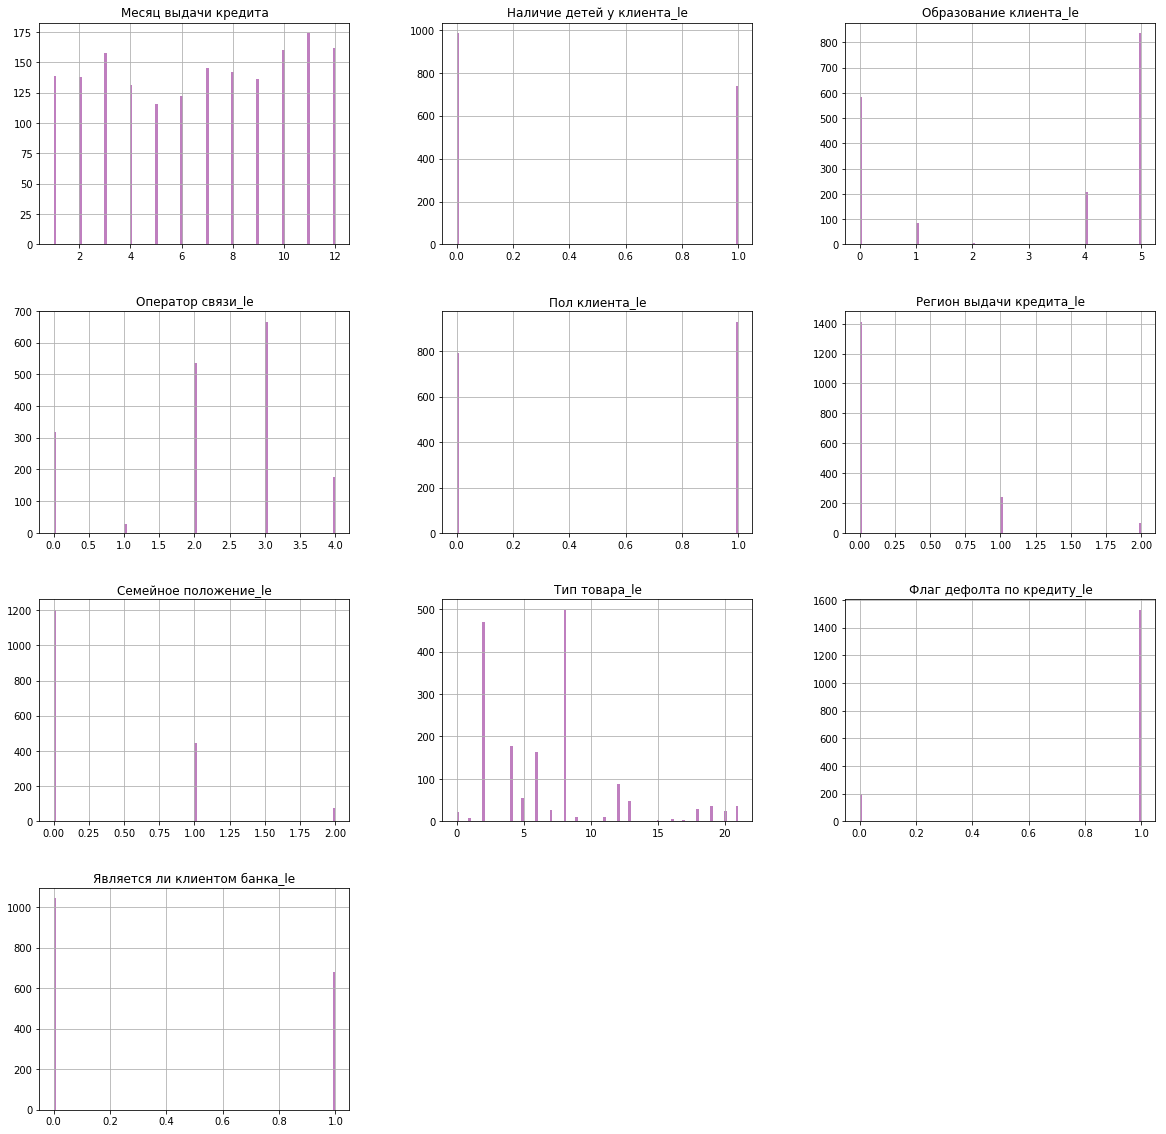

In [15]:
data[new_categ + ["Месяц выдачи кредита"]].hist(color='purple', alpha=0.5, bins=100, figsize =(20, 20))

/home/andrey/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/andrey/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


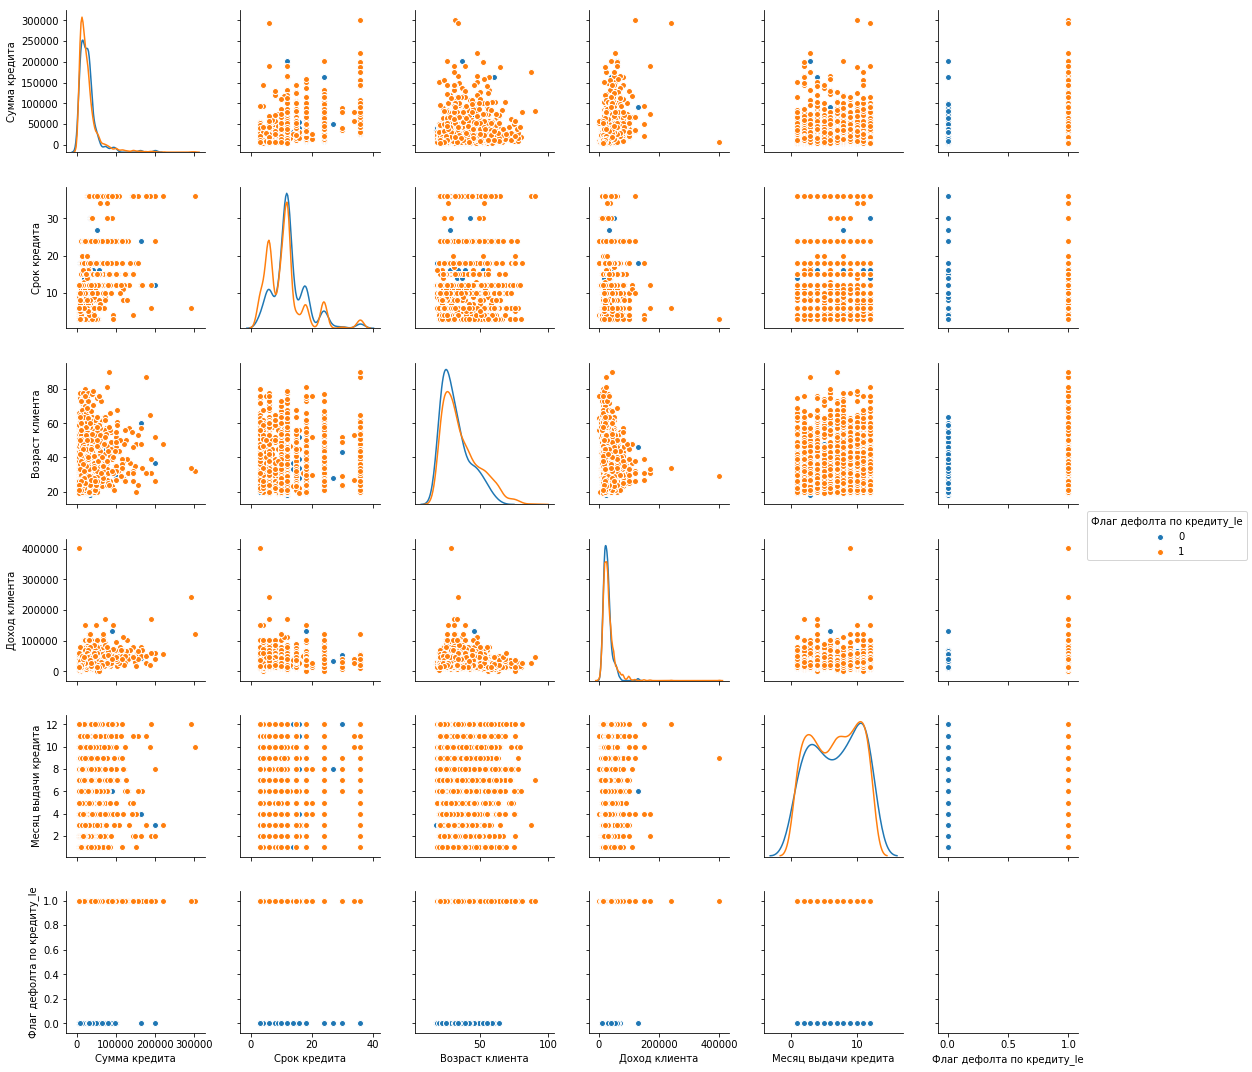

In [16]:
seaborn.pairplot(data[numerical_feat+["Месяц выдачи кредита"]+["Флаг дефолта по кредиту_le"]], 
        hue="Флаг дефолта по кредиту_le", diag_kind="kde")

/home/andrey/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/andrey/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


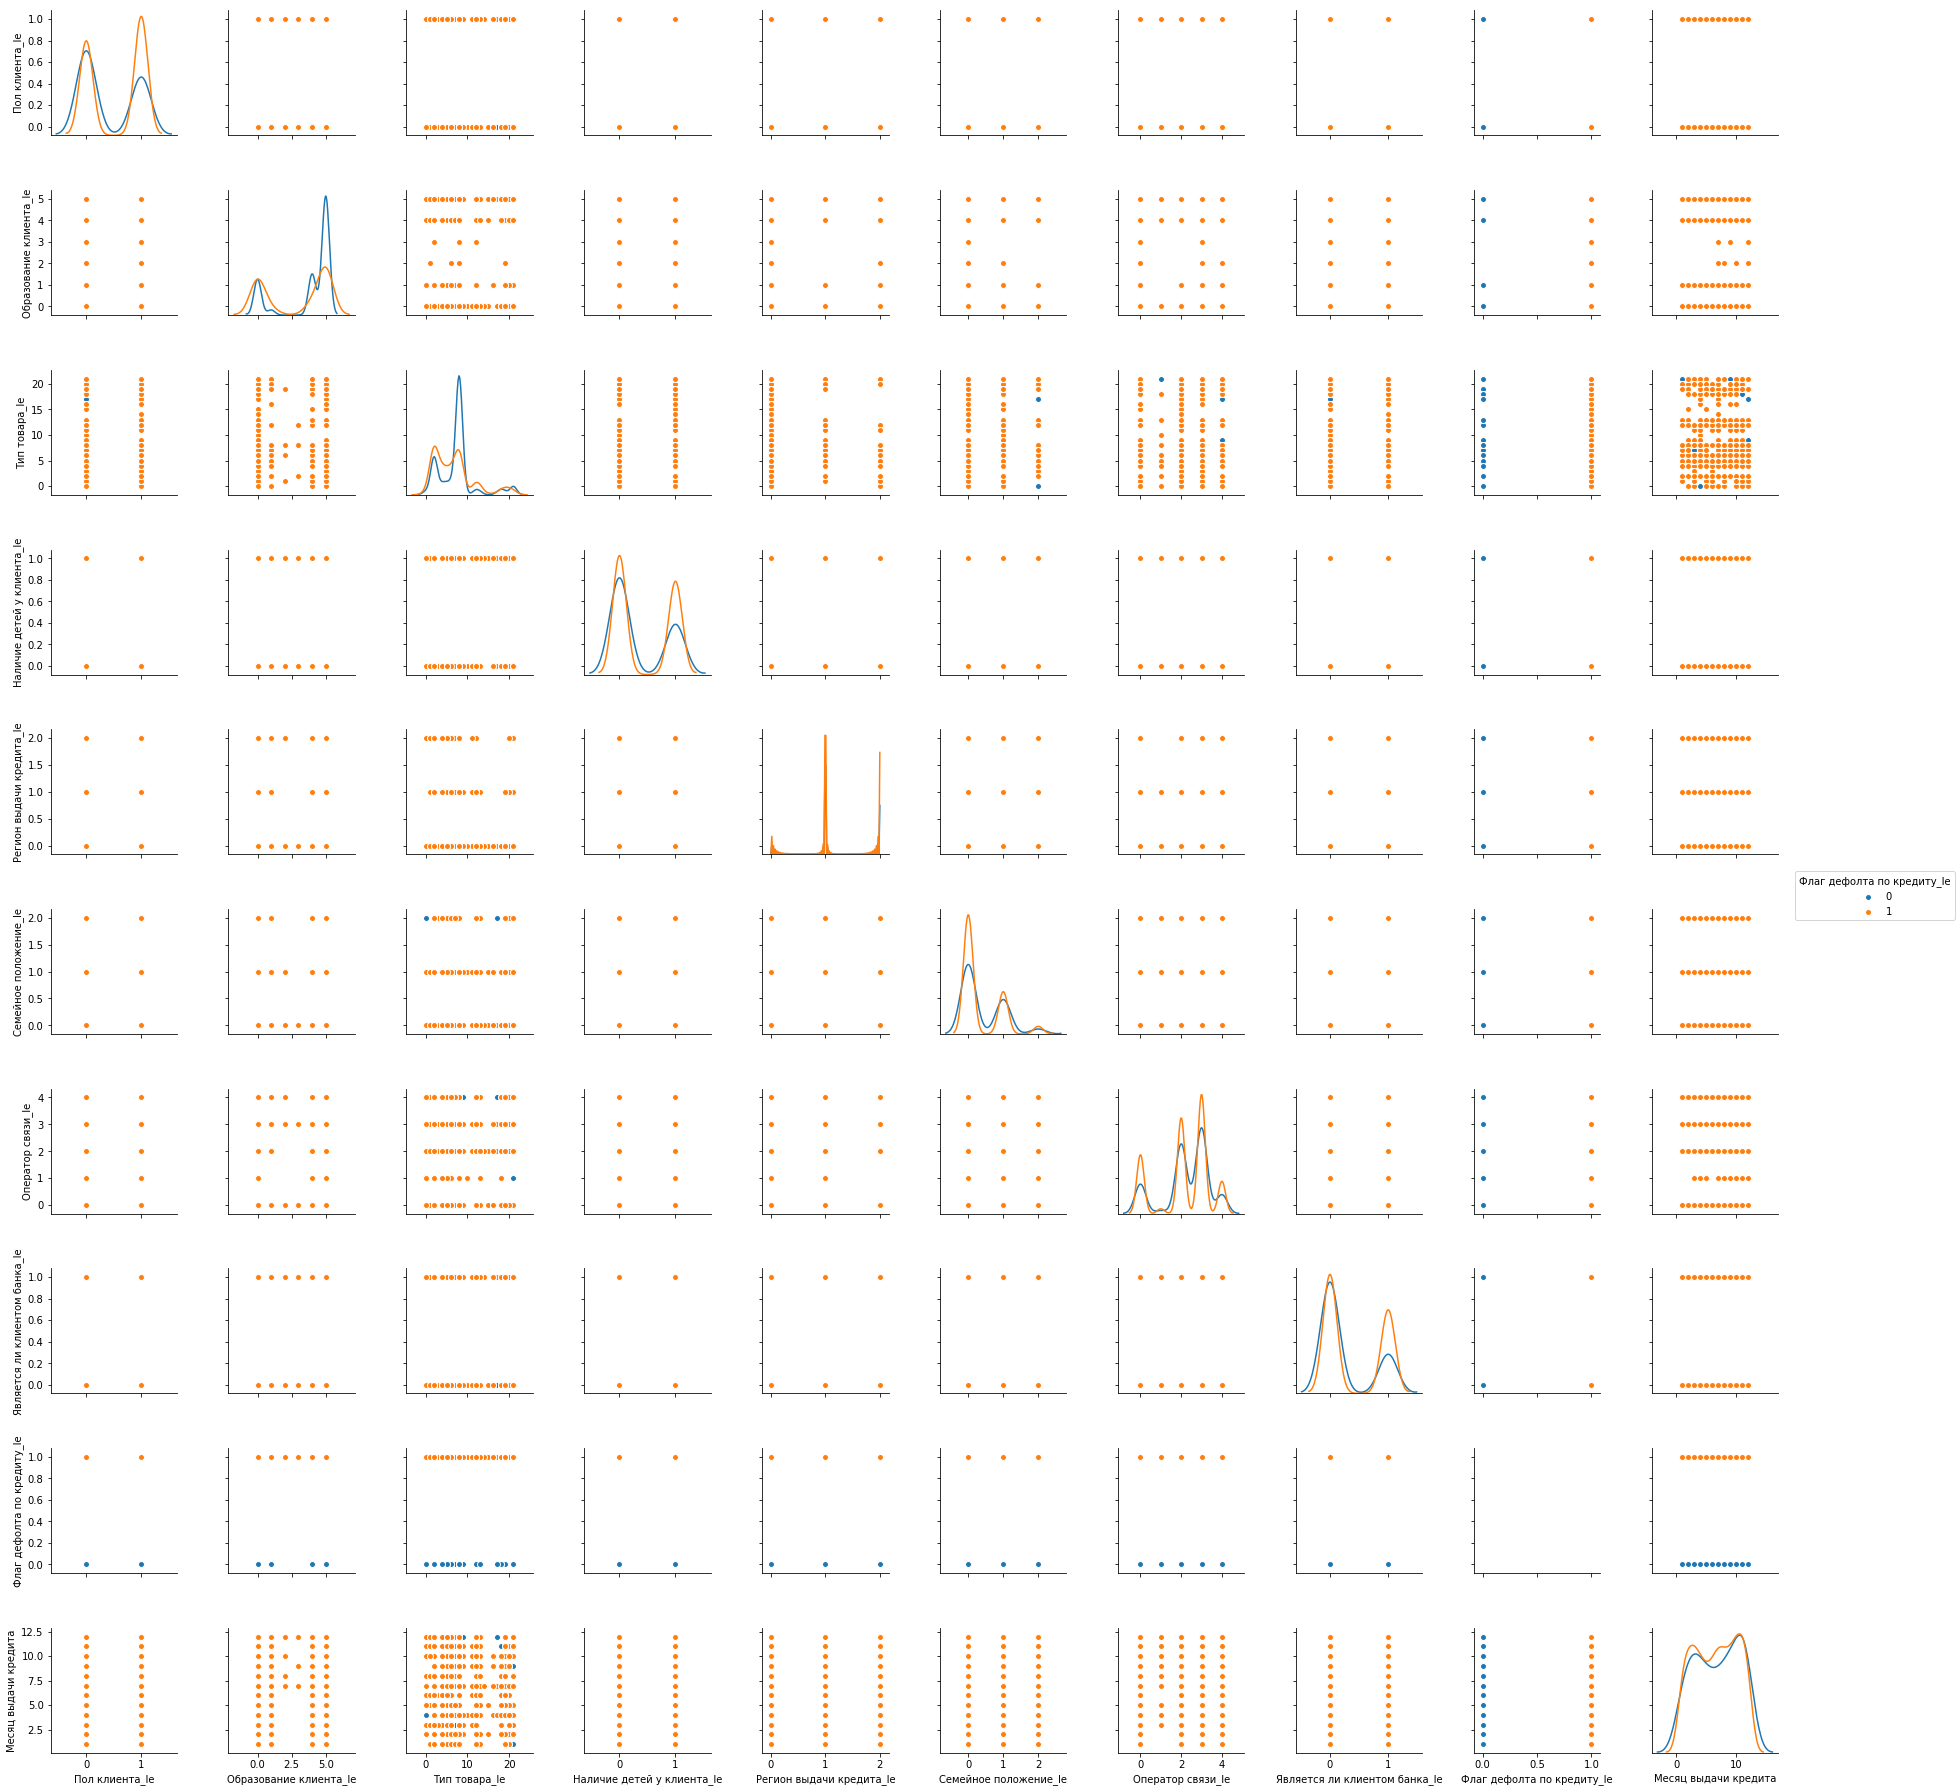

In [17]:
seaborn.pairplot(data[new_categ+["Месяц выдачи кредита"]], 
        hue="Флаг дефолта по кредиту_le", diag_kind="kde")

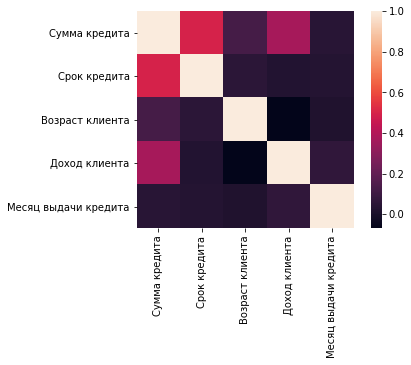

In [18]:
seaborn.heatmap(data[numerical_feat + ["Месяц выдачи кредита"]].corr(), square=True)

In [19]:
data.shape

(1723, 23)

In [20]:
type (new_categ)

list

In [21]:
data1 = data[numerical_feat + ["Флаг дефолта по кредиту","Флаг дефолта по кредиту_le"]] 

data1.head()

,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента,Флаг дефолта по кредиту,Флаг дефолта по кредиту_le
0,7000,12,39,21000,Нет дефолта,1
1,19000,6,20,17000,Нет дефолта,1
2,29000,12,23,31000,Нет дефолта,1
3,10000,12,30,31000,Нет дефолта,1
4,14500,12,25,26000,Нет дефолта,1


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


IndexError: index 2 is out of bounds for axis 0 with size 2

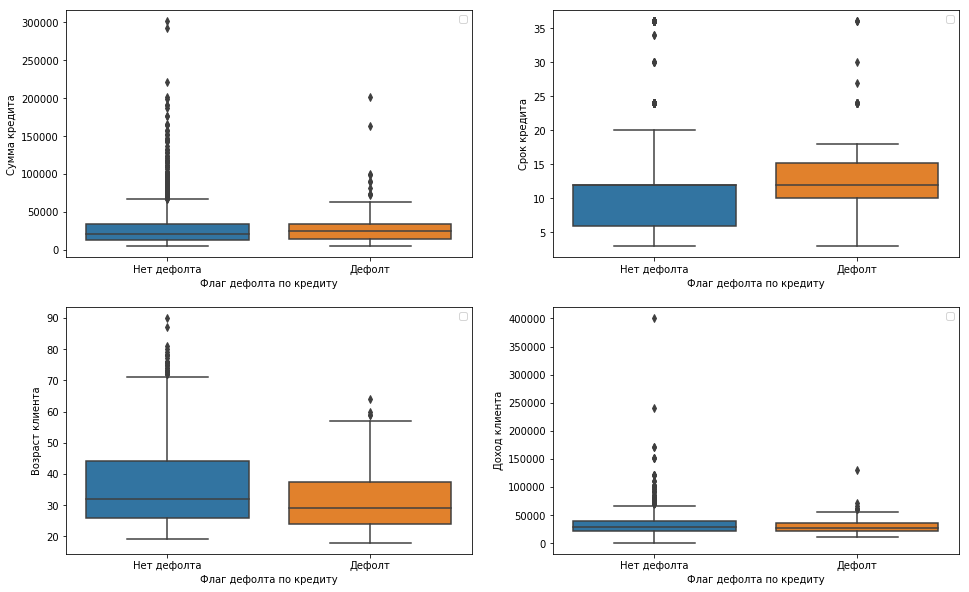

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for idx, feat in  enumerate(data1.columns):
    seaborn.boxplot(x='Флаг дефолта по кредиту', y=feat, data=data1, ax=axes[idx // 2, idx % 2])
    axes[idx // 2, idx % 2].legend()
    axes[idx // 2, idx % 2].set_xlabel('Флаг дефолта по кредиту')
    axes[idx // 2, idx % 2].set_ylabel(feat)

In [23]:
graph_categ_feat = data.columns.drop(numerical_feat).drop(["Флаг дефолта по кредиту"]).tolist()
graph_categ_feat = graph_categ_feat[0:8]
graph_categ_feat

['Месяц выдачи кредита',
 'Пол клиента',
 'Образование клиента',
 'Тип товара',
 'Наличие детей у клиента',
 'Регион выдачи кредита',
 'Семейное положение',
 'Оператор связи']

In [24]:
data[graph_categ_feat+new_categ].head()

,Месяц выдачи кредита,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Семейное положение,Оператор связи,Пол клиента_le,Образование клиента_le,Тип товара_le,Наличие детей у клиента_le,Регион выдачи кредита_le,Семейное положение_le,Оператор связи_le,Является ли клиентом банка_le,Флаг дефолта по кредиту_le
0,1,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,Другое,МТС,1,5,8,0,0,0,2,1,1
1,1,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,Другое,Теле2,1,5,2,1,0,0,4,0,1
2,1,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,Другое,Билайн,0,5,2,0,0,0,0,1,1
3,1,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,Никогда не был(а) женат/замужем,Теле2,1,5,8,1,0,2,4,0,1
4,1,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,Женат/замужем,МТС,0,0,8,0,0,1,2,0,1


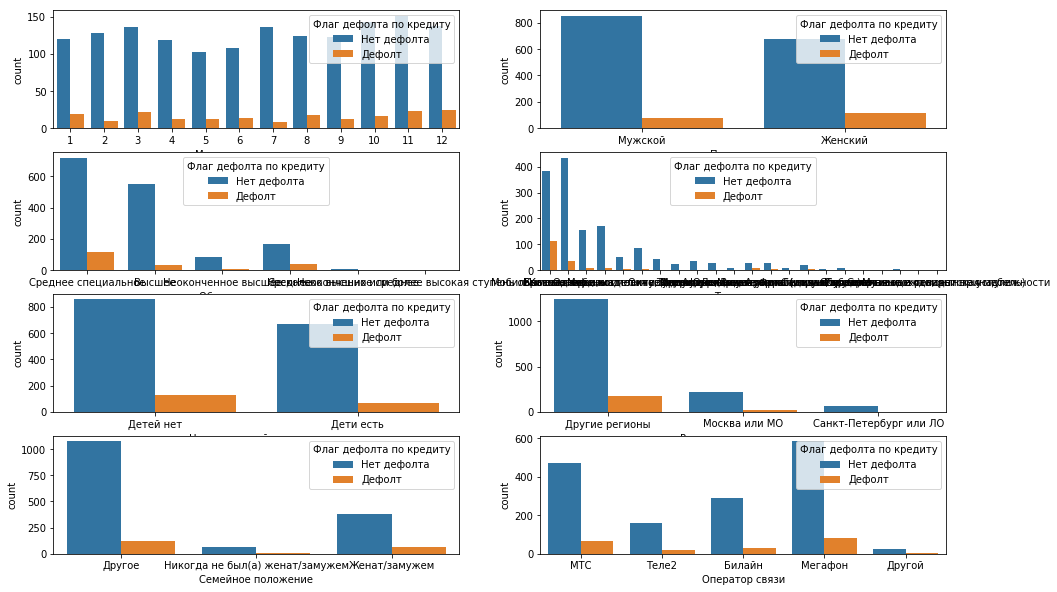

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 10))

for idx, feat in enumerate(graph_categ_feat):
    seaborn.countplot(x=feat, hue='Флаг дефолта по кредиту', data=data, ax=axes[idx // 2, idx % 2]);


In [26]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

In [27]:
X = data[data.columns.drop(categ_feat).drop(['Флаг дефолта по кредиту_le'])]
X.head()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента,Пол клиента_le,Образование клиента_le,Тип товара_le,Наличие детей у клиента_le,Регион выдачи кредита_le,Семейное положение_le,Оператор связи_le,Является ли клиентом банка_le
0,1,7000,12,39,21000,1,5,8,0,0,0,2,1
1,1,19000,6,20,17000,1,5,2,1,0,0,4,0
2,1,29000,12,23,31000,0,5,2,0,0,0,0,1
3,1,10000,12,30,31000,1,5,8,1,0,2,4,0
4,1,14500,12,25,26000,0,0,8,0,0,1,2,0


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
%%time
tsne = TSNE(random_state=1)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 26.6 s, sys: 2.06 s, total: 28.7 s
Wall time: 28.7 s


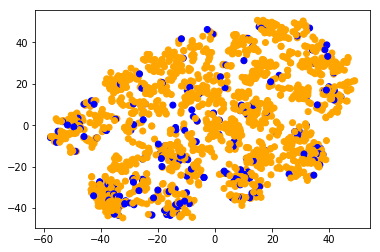

In [30]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=data['Флаг дефолта по кредиту_le'].map({0: 'blue', 1: 'orange'}));

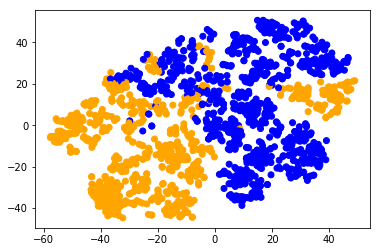

In [31]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=data['Пол клиента'].map({'Мужской': 'blue', 'Женский': 'orange'}))

# Модели

In [81]:

#categ_feat_model = data.columns.drop(numerical_feat).drop(['Флаг дефолта по кредиту']).drop[]tolist()
data2 = pd.read_excel('data_bank.xlsx', sep=";")
#data2 = data2.assign(['Флаг дефолта по кредиту_le'] = data[['Флаг дефолта по кредиту_le']].values)
#regressor = 

In [46]:
le = LabelEncoder()

data2['Флаг дефолта по кредиту_le'] = le.fit_transform(data2['Флаг дефолта по кредиту'])

In [47]:
data2.head()

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка,Флаг дефолта по кредиту,Флаг дефолта по кредиту_le
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка,Нет дефолта,1
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка,Нет дефолта,1
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка,Нет дефолта,1
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка,Нет дефолта,1
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка,Нет дефолта,1


In [84]:
target = data[['Флаг дефолта по кредиту_le']]
regressor = data2.columns.drop(['Флаг дефолта по кредиту_le']).drop(['Флаг дефолта по кредиту'])

KeyError: "labels ['Флаг дефолта по кредиту_le'] not contained in axis"

In [88]:
regressor = data2[regressor]


ValueError: Must pass DataFrame with boolean values only

In [89]:
regressor

,Месяц выдачи кредита,Сумма кредита,Срок кредита,Возраст клиента,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Доход клиента,Семейное положение,Оператор связи,Является ли клиентом банка
0,1,7000,12,39,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,21000,Другое,МТС,Не клиент банка
1,1,19000,6,20,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,17000,Другое,Теле2,Клиент банка
2,1,29000,12,23,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,31000,Другое,Билайн,Не клиент банка
3,1,10000,12,30,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,31000,Никогда не был(а) женат/замужем,Теле2,Клиент банка
4,1,14500,12,25,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка
5,1,32500,24,47,Женский,Среднее специальное,Мебель,Детей нет,Другие регионы,26000,Женат/замужем,МТС,Клиент банка
6,1,8000,3,23,Мужской,Высшее,"Компьютеры, комплектующие",Детей нет,Другие регионы,21000,Другое,МТС,Клиент банка
7,1,20000,10,25,Женский,Высшее,Бытовая техника,Детей нет,Москва или МО,33000,Женат/замужем,Билайн,Клиент банка
8,1,26000,6,21,Женский,Среднее специальное,Мобильные телефоны,Детей нет,Москва или МО,31000,Другое,Билайн,Клиент банка
9,1,15000,24,25,Женский,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,26000,Другое,Теле2,Не клиент банка


In [98]:
categ_model_x = data2[categ_feat]
num_model_x = data2[['Сумма кредита', "Срок кредита", "Возраст клиента", "Доход клиента"]]

In [99]:
num_model_x

,Сумма кредита,Срок кредита,Возраст клиента,Доход клиента
0,7000,12,39,21000
1,19000,6,20,17000
2,29000,12,23,31000
3,10000,12,30,31000
4,14500,12,25,26000
5,32500,24,47,26000
6,8000,3,23,21000
7,20000,10,25,33000
8,26000,6,21,31000
9,15000,24,25,26000


In [93]:
categ_model_x

,Пол клиента,Образование клиента,Тип товара,Наличие детей у клиента,Регион выдачи кредита,Семейное положение,Оператор связи,Является ли клиентом банка
0,Мужской,Среднее специальное,Мобильные телефоны,Детей нет,Другие регионы,Другое,МТС,Не клиент банка
1,Мужской,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,Другое,Теле2,Клиент банка
2,Женский,Среднее специальное,Бытовая техника,Детей нет,Другие регионы,Другое,Билайн,Не клиент банка
3,Мужской,Среднее специальное,Мобильные телефоны,Дети есть,Другие регионы,Никогда не был(а) женат/замужем,Теле2,Клиент банка
4,Женский,Высшее,Мобильные телефоны,Детей нет,Другие регионы,Женат/замужем,МТС,Клиент банка
5,Женский,Среднее специальное,Мебель,Детей нет,Другие регионы,Женат/замужем,МТС,Клиент банка
6,Мужской,Высшее,"Компьютеры, комплектующие",Детей нет,Другие регионы,Другое,МТС,Клиент банка
7,Женский,Высшее,Бытовая техника,Детей нет,Москва или МО,Женат/замужем,Билайн,Клиент банка
8,Женский,Среднее специальное,Мобильные телефоны,Детей нет,Москва или МО,Другое,Билайн,Клиент банка
9,Женский,Среднее специальное,Бытовая техника,Дети есть,Другие регионы,Другое,Теле2,Не клиент банка


In [96]:
from sklearn.feature_extraction import DictVectorizer as DV

encoder = DV(sparse = False)
cat_hot_x = encoder.fit_transform(categ_model_x.T.to_dict().values())


array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse = False)
#ohe_cat_x = ohe.fit_transform()

In [101]:
from sklearn.cross_validation import train_test_split

(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(cat_hot_x, 
                                   test_size=0.3, 
                                   random_state=0, stratify = target)

(X_train_num, 
 X_test_num, 
 y_train, y_test) = train_test_split(num_model_x, target, 
                                     test_size=0.3, 
                                     random_state=0, stratify = target)

In [107]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler_train = StandardScaler()
scaler_train.fit(X_train_num, y_train)

X_train_num_scaled=scaler_train.transform(X_train_num)
X_test_num_scaled=scaler_train.transform(X_test_num)

x_train=np.hstack((X_train_num_scaled,X_train_cat_oh))
x_test=np.hstack((X_test_num_scaled,X_test_cat_oh))



In [117]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

classifier = [LogisticRegression(class_weight='balanced', random_state = 0),
              RandomForestClassifier(n_estimators=165, max_depth=4, criterion='entropy'),
              GradientBoostingClassifier(max_depth =4),
              KNeighborsClassifier(n_neighbors=20),
             xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=40, min_child_weight=3)]



# Быстрый путь

/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e

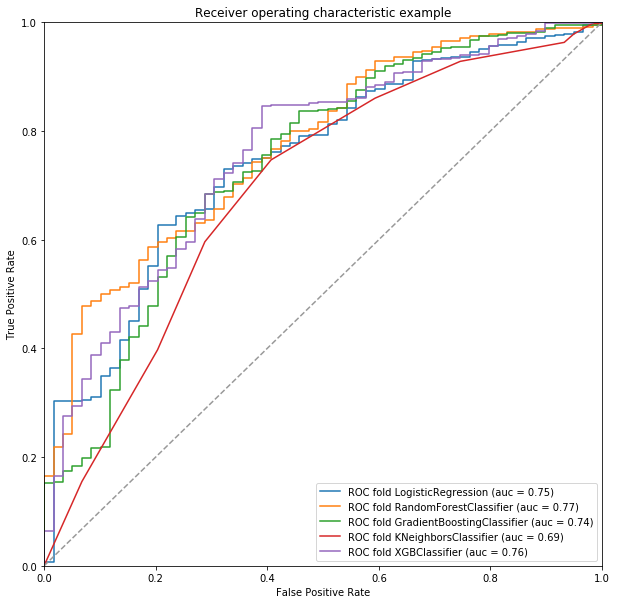

In [118]:
import matplotlib.pyplot as plt
import string, re, pylab as pl
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(10, 10)) 
for model in classifier:
    model.fit(x_train, y_train)
    pred_scr = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred_scr)
    roc_auc = roc_auc_score(y_test, pred_scr)
    md = str(model)
    md = md[:md.find('(')]
    pl.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
pl.xlim([0, 1])
pl.ylim([0, 1])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# Подробный путь

### LogisticRegression

In [194]:
classifier1 = LogisticRegression(random_state=0, class_weight='balanced')

classifier1.get_params().keys()


dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [195]:
param_grid1 = {'penalty' : ['l1', 'l2'],
              'C' : [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}

In [189]:
x_train


array([[ 0.89123361,  0.06306297, -0.66661468, ...,  0.        ,
         1.        ,  0.        ],
       [-0.80854668, -1.3253456 ,  0.38644691, ...,  0.        ,
         1.        ,  0.        ],
       [-0.31277743, -0.86254275, -0.44095863, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.55481876,  0.98866868,  0.91297771, ...,  0.        ,
         0.        ,  1.        ],
       [-0.18883511, -0.24547227, -0.89227074, ...,  0.        ,
         1.        ,  0.        ],
       [-0.31277743,  0.06306297,  1.36428982, ...,  0.        ,
         1.        ,  0.        ]])

In [215]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, f1_score, log_loss

In [218]:
grid_cv = GridSearchCV(classifier1, param_grid=param_grid1,  cv = 3)

grid = grid_cv.fit(x_train, y_train.values[:,0])

pred = grid_cv.best_estimator_.predict_proba(x_test)[:,1]

roc = roc_auc_score(y_test, pred)
pr = average_precision_score(y_test, pred)
#accuracy = accuracy_score(y_test, pred)
#f1 = f1_score(y_test, pred)
logloss = log_loss(y_test, pred)

print(roc)

0.7432832506846272


In [220]:
print ('roc: ', roc)
print ('pr: ', pr)
print ('log-loss: ', logloss)

roc:  0.7432832506846272
pr:  0.9503356825154148
log-loss:  0.5784577312081902


In [221]:
print(grid.best_estimator_)
print (grid.best_score_)
print (grid.best_params_)

LogisticRegression(C=5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.6998341625207297
{'C': 5, 'penalty': 'l2'}


### RandomForestClassifier

In [169]:
classifier2 = RandomForestClassifier(random_state=0, class_weight='balanced')

classifier2.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [170]:
param_grid2 = {'n_jobs' : [1,5,10,15,20],
              'max_depth' : [5,7,10,15],
              'criterion' : ['gini', 'entropy']
             }

In [222]:
grid_cv = GridSearchCV(classifier2, param_grid2,  cv = 3)

grid = grid_cv.fit(x_train, y_train.values[:,0])

pred = grid_cv.best_estimator_.predict_proba(x_test)[:,1]

roc = roc_auc_score(y_test, pred)
pr = average_precision_score(y_test, pred)
#accuracy = accuracy_score(y_test, pred)
#f1 = f1_score(y_test, pred)
logloss = log_loss(y_test, pred)


In [223]:
print ('roc: ', roc)
print ('pr: ', pr)
print ('log-loss: ', logloss)

roc:  0.6479350159129598
pr:  0.9228196031937552
log-loss:  1.1390141041268145


In [224]:
print(grid.best_estimator_)
print (grid.best_score_)
print (grid.best_params_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
0.8723051409618574
{'criterion': 'entropy', 'max_depth': 15, 'n_jobs': 1}


In [225]:
print(grid.grid_scores_)

[mean: 0.76119, std: 0.01258, params: {'criterion': 'gini', 'max_depth': 5, 'n_jobs': 1}, mean: 0.76119, std: 0.01258, params: {'criterion': 'gini', 'max_depth': 5, 'n_jobs': 5}, mean: 0.76119, std: 0.01258, params: {'criterion': 'gini', 'max_depth': 5, 'n_jobs': 10}, mean: 0.76119, std: 0.01258, params: {'criterion': 'gini', 'max_depth': 5, 'n_jobs': 15}, mean: 0.76119, std: 0.01258, params: {'criterion': 'gini', 'max_depth': 5, 'n_jobs': 20}, mean: 0.81012, std: 0.02259, params: {'criterion': 'gini', 'max_depth': 7, 'n_jobs': 1}, mean: 0.81012, std: 0.02259, params: {'criterion': 'gini', 'max_depth': 7, 'n_jobs': 5}, mean: 0.81012, std: 0.02259, params: {'criterion': 'gini', 'max_depth': 7, 'n_jobs': 10}, mean: 0.81012, std: 0.02259, params: {'criterion': 'gini', 'max_depth': 7, 'n_jobs': 15}, mean: 0.81012, std: 0.02259, params: {'criterion': 'gini', 'max_depth': 7, 'n_jobs': 20}, mean: 0.84909, std: 0.01415, params: {'criterion': 'gini', 'max_depth': 10, 'n_jobs': 1}, mean: 0.84909

### xgb.XGBClassifier

In [204]:
classifier3 = xgb.XGBClassifier(random_state=0)

classifier3.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample'])

In [207]:
param_grid3 = {'max_depth' : [1,3,5,7,10],
              'learning_rate' : [0.001, 0.01, 0.1, 1, 10]}

In [226]:
grid_cv = GridSearchCV(classifier3, param_grid3,  cv = 3)

grid = grid_cv.fit(x_train, y_train.values[:,0])

pred = grid_cv.best_estimator_.predict_proba(x_test)[:,1]

roc = roc_auc_score(y_test, pred)
pr = average_precision_score(y_test, pred)
#accuracy = accuracy_score(y_test, pred)
#f1 = f1_score(y_test, pred)
logloss = log_loss(y_test, pred)


/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is a

/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is a

/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/andrey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is a

In [227]:
print ('roc: ', roc)
print ('pr: ', pr)
print ('log-loss: ', logloss)

roc:  0.6658648508622603
pr:  0.9211860366462348
log-loss:  0.637135095361123


In [228]:
print(grid.best_estimator_)
print (grid.best_score_)
print (grid.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
0.8864013266998342
{'learning_rate': 0.001, 'max_depth': 1}


Итого

roc:  0.7432832506846272
pr:  0.9503356825154148
log-loss:  0.5784577312081902
          
roc:  0.6479350159129598
pr:  0.9228196031937552
log-loss:  1.1390141041268145  
          
roc:  0.6658648508622603
pr:  0.9211860366462348
log-loss:  0.637135095361123

Вывод: логрегрессия зе бест